In [ ]:
Task 1

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
url= ('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv')
titanic = pd.read_csv(url)

In [7]:
titanic

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0000,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN


In [18]:
titanic['sex'].value_counts()

male      843
female    466
Name: sex, dtype: int64

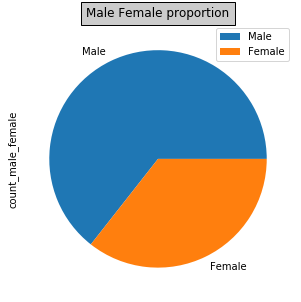

In [27]:
df = pd.DataFrame({'count_male_female': [843,466]},index=['Male', 'Female'])
plot = df.plot.pie(y='count_male_female', figsize=(5, 5))
plt.title("Male Female proportion", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

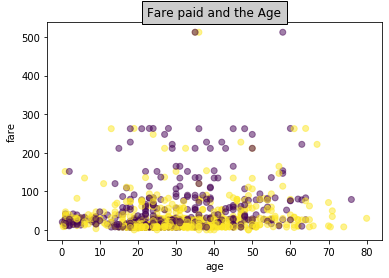

In [47]:
plt.scatter(titanic['age'], titanic['fare'], alpha=0.5, c=pd.factorize(titanic['sex'])[0])
plt.xlabel('age')
plt.ylabel('fare')
plt.title('Fare paid and the Age', bbox={'facecolor':'0.8', 'pad':5})
plt.show()

In [ ]:
task 2

In [64]:
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN','londON_StockhOlm','Budapest_PaRis', 'Brussels_londOn'],
'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )','12. Air France', '"Swiss Air"']})

In [65]:
df

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045.0,"[23, 47]",KLM(!)
1,MAdrid_miLAN,NaN,[],<Air France> (12)
2,londON_StockhOlm,10065.0,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,NaN,[13],12. Air France
4,Brussels_londOn,10085.0,"[67, 32]","""Swiss Air"""


In [66]:
#1. Some values in the the FlightNumber column are missing. These numbers are
#meant to increase by 10 with each row so 10055 and 10075 need to be put in place. Fill in these
#missing numbers and make the column an integer column (instead of a float column).


for i in range(1, df['FlightNumber'].count() + 1):
      if pd.isnull(df.loc[i,'FlightNumber']):
            df.loc[i, 'FlightNumber'] = df.loc[i-1, 'FlightNumber'] + 10

In [67]:
df

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045.0,"[23, 47]",KLM(!)
1,MAdrid_miLAN,10055.0,[],<Air France> (12)
2,londON_StockhOlm,10065.0,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,10075.0,[13],12. Air France
4,Brussels_londOn,10085.0,"[67, 32]","""Swiss Air"""


In [68]:
#2. The From_To column would be better as two separate columns! Split each
#string on the underscore delimiter _ to give a new temporary DataFrame with
#the correct values. Assign the correct column names to this temporaryDataFrame.

correct_col = df['From_To'].str.split('_',n=1,expand=True)
correct_col.columns = ['From','To']
correct_col

,From,To
0,LoNDon,paris
1,MAdrid,miLAN
2,londON,StockhOlm
3,Budapest,PaRis
4,Brussels,londOn


In [69]:
#3. Notice how the capitalisation of the city names is all mixed up in this
#temporary DataFrame. Standardise the strings so that only the first letter is
#uppercase (e.g. "londON" should become "London".)

correct_col['From'] = correct_col.From.str.title()
correct_col['To'] =correct_col.To.str.title()
correct_col

,From,To
0,London,Paris
1,Madrid,Milan
2,London,Stockholm
3,Budapest,Paris
4,Brussels,London


In [70]:
#4. Delete the From_To column from df and attach the temporary DataFrame from the previous questions.

df.drop(columns = 'From_To', inplace = True)
df['From'] = correct_col['From']
df['To'] = correct_col['To']
df

,FlightNumber,RecentDelays,Airline,From,To
0,10045.0,"[23, 47]",KLM(!),London,Paris
1,10055.0,[],<Air France> (12),Madrid,Milan
2,10065.0,"[24, 43, 87]",(British Airways. ),London,Stockholm
3,10075.0,[13],12. Air France,Budapest,Paris
4,10085.0,"[67, 32]","""Swiss Air""",Brussels,London
